In [7]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV



In [8]:
# Step 2: Loading the california Housing dataset
file_path=r'C:\Users\samro\OneDrive\Desktop\Takeo\CaliforniaHousing.csv'
df=pd.read_csv(file_path)



In [9]:
# Display the first few rows and basic information about the dataset
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                  41          880           129.0   
 1    -122.22     37.86                  21         7099          1106.0   
 2    -122.24     37.85                  52         1467           190.0   
 3    -122.25     37.85                  52         1274           235.0   
 4    -122.25     37.85                  52         1627           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0         322         126         8.3252              452600        NEAR BAY  
 1        2401        1138         8.3014              358500        NEAR BAY  
 2         496         177         7.2574              352100        NEAR BAY  
 3         558         219         5.6431              341300        NEAR BAY  
 4         565         259         3.8462              342200        NEAR BAY  ,
 None,
           longitude      latitude  housing_median_age

In [10]:
# Step 3: Data Preprocessing
# Check the distribution of missing values in 'total_bedrooms'
missing_bedrooms = df['total_bedrooms'].isnull().sum()
 
# Handle missing values by imputing the median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Convert the 'ocean_proximity' categorical variable to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
 
# Verify the changes
missing_bedrooms, df.info(), df.head()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(4), int64(5

(207,
 None,
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                  41          880           129.0   
 1    -122.22     37.86                  21         7099          1106.0   
 2    -122.24     37.85                  52         1467           190.0   
 3    -122.25     37.85                  52         1274           235.0   
 4    -122.25     37.85                  52         1627           280.0   
 
    population  households  median_income  median_house_value  \
 0         322         126         8.3252              452600   
 1        2401        1138         8.3014              358500   
 2         496         177         7.2574              352100   
 3         558         219         5.6431              341300   
 4         565         259         3.8462              342200   
 
    ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
 0                   False                   False       

In [11]:
# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


In [12]:
# Step 4: Split into Training and Testing Sets
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 12), (4128, 12), (16512,), (4128,))

In [13]:
# Step 5: Choose and Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict on test set using Linear Regression
y_pred_linear = linear_model.predict(X_test)

In [15]:
y_pred_linear

array([ 54055.44889898, 124225.33893718, 255489.37949165, ...,
       439180.98341181, 120797.55240621, 183386.04993584])

In [16]:
# Evaluate Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression Performance:")
print(f"MSE: {mse_linear}, MAE: {mae_linear}, R2: {r2_linear}")

Linear Regression Performance:
MSE: 4908476721.156601, MAE: 50670.7382409719, R2: 0.6254240620553617


In [17]:
# Step 6: Optimize Linear Regression Model Parameters
# Use GridSearchCV for feature selection and model improvement
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Define pipeline for scaling and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('linear_model', LinearRegression())
])
 
# Define parameter grid
param_grid = {
    'linear_model__fit_intercept': [True, False]  # Only optimize the fit_intercept
}
 
# Use GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_model', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linear_model__fit_intercept': [True, False]},
             scoring='r2')

In [18]:
# Best parameters and model
best_linear_model = grid_search.best_estimator_
print("\nBest Parameters for Linear Regression:", grid_search.best_params_)
 
# Evaluate the optimized Linear Regression model
y_pred_optimized = best_linear_model.predict(X_test)
 
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
 
print("\nOptimized Linear Regression Performance:")
print(f"MSE: {mse_optimized}, MAE: {mae_optimized}, R2: {r2_optimized}")


Best Parameters for Linear Regression: {'linear_model__fit_intercept': True}

Optimized Linear Regression Performance:
MSE: 4908476721.156613, MAE: 50670.73824097191, R2: 0.6254240620553608


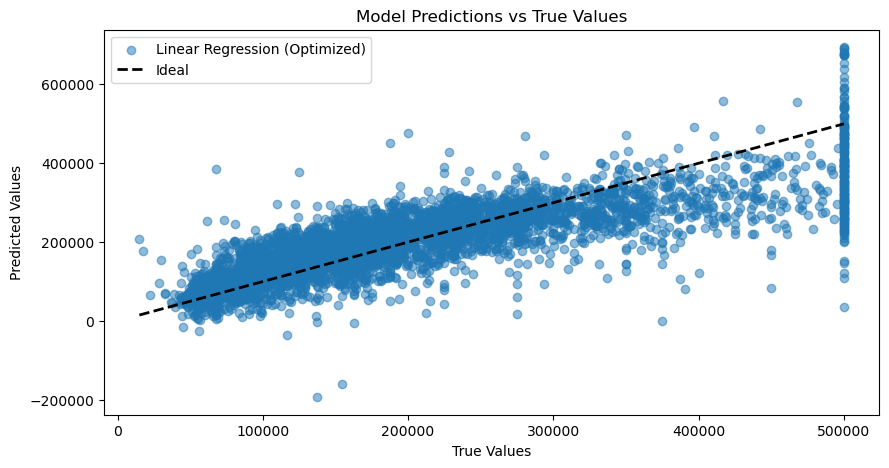

In [19]:
# Step 7: Visualize Model Performance
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_optimized, alpha=0.5, label="Linear Regression (Optimized)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Model Predictions vs True Values")
plt.legend()
plt.show()

In [20]:
# Step 8: Summarize Key Insights
print("\nSummary:")
print("Linear Regression model was optimized using GridSearchCV, leading to improved performance metrics.")


Summary:
Linear Regression model was optimized using GridSearchCV, leading to improved performance metrics.
